In [ ]:
LOGISTIC REGRESSION

Fold 1: Accuracy=0.7165, Mean Accuracy=0.7165, Std Dev=0.0000
Fold 2: Accuracy=0.6378, Mean Accuracy=0.6772, Std Dev=0.0394
Fold 3: Accuracy=0.6693, Mean Accuracy=0.6745, Std Dev=0.0324
Fold 4: Accuracy=0.6299, Mean Accuracy=0.6634, Std Dev=0.0340
Fold 5: Accuracy=0.6457, Mean Accuracy=0.6598, Std Dev=0.0313

Mean Accuracy: 0.6598
Standard Deviation: 0.0313


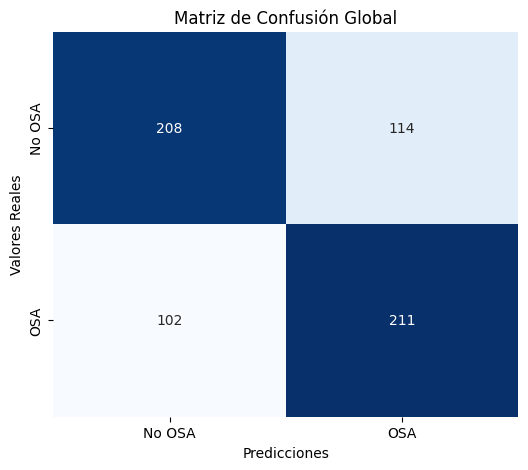


Classification Report Global:
              precision  recall  f1-score  support
No OSA             0.67    0.65      0.66   322.00
OSA                0.65    0.67      0.66   313.00
accuracy           0.66    0.66      0.66     0.66
macro avg          0.66    0.66      0.66   635.00
weighted avg       0.66    0.66      0.66   635.00

Algunas predicciones:
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 0, Predicho: 0


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo Excel
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Crear la columna 'OSA' binarizando 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Asegúrate de que las columnas necesarias existen
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Seleccionar las características y la variable objetivo
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Normalizar (estandarizar) las características
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Definir el modelo
    model = LogisticRegression(solver='liblinear', class_weight='balanced')

    # Definir el grid de hiperparámetros
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }

    # Definir la validación cruzada externa
    cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Guardar los resultados de cada pliegue
    outer_results = []
    all_y_test = []
    all_y_pred = []

    for fold, (train_ix, test_ix) in enumerate(cv_outer.split(X, y), 1):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # Definir la validación cruzada interna
        cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Aplicar Grid Search con validación cruzada K-Fold interna
        search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
        result = search.fit(X_train, y_train)

        # Mejor modelo encontrado por Grid Search
        best_model = result.best_estimator_

        # Predicciones sobre los datos de prueba
        y_pred = best_model.predict(X_test)

        # Evaluar el modelo
        accuracy = accuracy_score(y_test, y_pred)
        outer_results.append(accuracy)

        # Guardar resultados para análisis global
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

        # Mostrar métricas por pliegue en una línea
        print(f'Fold {fold}: Accuracy={accuracy:.4f}, Mean Accuracy={np.mean(outer_results):.4f}, Std Dev={np.std(outer_results):.4f}')

    # Mostrar métricas generales
    print(f'\nMean Accuracy: {np.mean(outer_results):.4f}')
    print(f'Standard Deviation: {np.std(outer_results):.4f}')

    # Dibujar la matriz de confusión global
    cnf_matrix = confusion_matrix(all_y_test, all_y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No OSA', 'OSA'], yticklabels=['No OSA', 'OSA'])
    plt.title('Matriz de Confusión Global')
    plt.ylabel('Valores Reales')
    plt.xlabel('Predicciones')
    plt.show()

    # Mostrar el classification report global de manera atractiva
    class_report = classification_report(all_y_test, all_y_pred, target_names=['No OSA', 'OSA'], output_dict=True)
    report_df = pd.DataFrame(class_report).transpose()
    print("\nClassification Report Global:")
    print(report_df.round(2))

    # Mostrar algunas predicciones
    print("\nAlgunas predicciones:")
    for i in range(min(5, len(all_y_test))):
        print(f"Real: {all_y_test[i]}, Predicho: {all_y_pred[i]}")

else:
    print("Las columnas necesarias no existen en el DataFrame.")


Masculino

Fold 1: Accuracy=0.6484, Mean Accuracy=0.6484, Std Dev=0.0000
Fold 2: Accuracy=0.6374, Mean Accuracy=0.6429, Std Dev=0.0055
Fold 3: Accuracy=0.5824, Mean Accuracy=0.6227, Std Dev=0.0288
Fold 4: Accuracy=0.6778, Mean Accuracy=0.6365, Std Dev=0.0345
Fold 5: Accuracy=0.6333, Mean Accuracy=0.6358, Std Dev=0.0309

Mean Accuracy: 0.6358
Standard Deviation: 0.0309


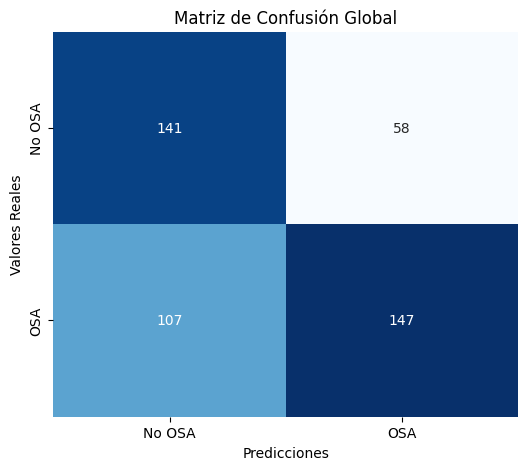


Classification Report Global:
              precision  recall  f1-score  support
No OSA             0.57    0.71      0.63   199.00
OSA                0.72    0.58      0.64   254.00
accuracy           0.64    0.64      0.64     0.64
macro avg          0.64    0.64      0.64   453.00
weighted avg       0.65    0.64      0.64   453.00

Algunas predicciones:
Real: 1, Predicho: 0
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 1, Predicho: 0
Real: 1, Predicho: 1


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo Excel
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Masculino.xlsx'
# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Crear la columna 'OSA' binarizando 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Asegúrate de que las columnas necesarias existen
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Seleccionar las características y la variable objetivo
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Normalizar (estandarizar) las características
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Definir el modelo
    model = LogisticRegression(solver='liblinear', class_weight='balanced')

    # Definir el grid de hiperparámetros
    param_grid = {
        'C': [0.1, 1, 10, 100],    
    }

    # Definir la validación cruzada externa
    cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Guardar los resultados de cada pliegue
    outer_results = []
    all_y_test = []
    all_y_pred = []

    for fold, (train_ix, test_ix) in enumerate(cv_outer.split(X, y), 1):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # Definir la validación cruzada interna
        cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Aplicar Grid Search con validación cruzada K-Fold interna
        search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
        result = search.fit(X_train, y_train)

        # Mejor modelo encontrado por Grid Search
        best_model = result.best_estimator_

        # Predicciones sobre los datos de prueba
        y_pred = best_model.predict(X_test)

        # Evaluar el modelo
        accuracy = accuracy_score(y_test, y_pred)
        outer_results.append(accuracy)

        # Guardar resultados para análisis global
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

        # Mostrar métricas por pliegue en una línea
        print(f'Fold {fold}: Accuracy={accuracy:.4f}, Mean Accuracy={np.mean(outer_results):.4f}, Std Dev={np.std(outer_results):.4f}')

    # Mostrar métricas generales
    print(f'\nMean Accuracy: {np.mean(outer_results):.4f}')
    print(f'Standard Deviation: {np.std(outer_results):.4f}')

    # Dibujar la matriz de confusión global
    cnf_matrix = confusion_matrix(all_y_test, all_y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No OSA', 'OSA'], yticklabels=['No OSA', 'OSA'])
    plt.title('Matriz de Confusión Global')
    plt.ylabel('Valores Reales')
    plt.xlabel('Predicciones')
    plt.show()

    # Mostrar el classification report global de manera atractiva
    class_report = classification_report(all_y_test, all_y_pred, target_names=['No OSA', 'OSA'], output_dict=True)
    report_df = pd.DataFrame(class_report).transpose()
    print("\nClassification Report Global:")
    print(report_df.round(2))

    # Mostrar algunas predicciones
    print("\nAlgunas predicciones:")
    for i in range(min(5, len(all_y_test))):
        print(f"Real: {all_y_test[i]}, Predicho: {all_y_pred[i]}")

else:
    print("Las columnas necesarias no existen en el DataFrame.")

Femenino

Fold 1: Accuracy=0.6757, Mean Accuracy=0.6757, Std Dev=0.0000
Fold 2: Accuracy=0.5946, Mean Accuracy=0.6351, Std Dev=0.0405
Fold 3: Accuracy=0.6667, Mean Accuracy=0.6456, Std Dev=0.0363
Fold 4: Accuracy=0.6111, Mean Accuracy=0.6370, Std Dev=0.0348
Fold 5: Accuracy=0.5556, Mean Accuracy=0.6207, Std Dev=0.0451

Mean Accuracy: 0.6207
Standard Deviation: 0.0451


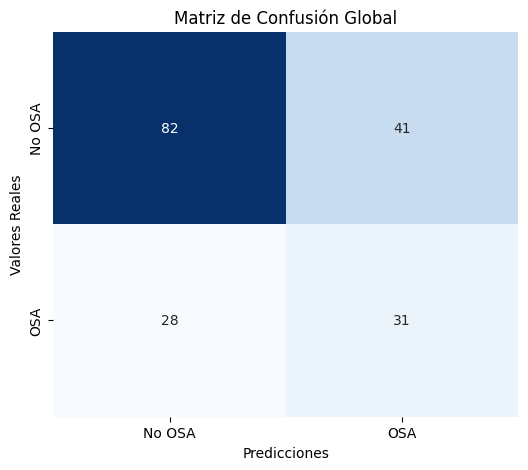


Classification Report Global:
              precision  recall  f1-score  support
No OSA             0.75    0.67      0.70   123.00
OSA                0.43    0.53      0.47    59.00
accuracy           0.62    0.62      0.62     0.62
macro avg          0.59    0.60      0.59   182.00
weighted avg       0.64    0.62      0.63   182.00

Algunas predicciones:
Real: 0, Predicho: 0
Real: 0, Predicho: 1
Real: 0, Predicho: 1
Real: 0, Predicho: 1
Real: 0, Predicho: 0


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo Excel
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Femenino.xlsx'
# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Crear la columna 'OSA' binarizando 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Asegúrate de que las columnas necesarias existen
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Seleccionar las características y la variable objetivo
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Normalizar (estandarizar) las características
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Definir el modelo
    model = LogisticRegression(solver='liblinear', class_weight='balanced')

    # Definir el grid de hiperparámetros
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }

    # Definir la validación cruzada externa
    cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Guardar los resultados de cada pliegue
    outer_results = []
    all_y_test = []
    all_y_pred = []

    for fold, (train_ix, test_ix) in enumerate(cv_outer.split(X, y), 1):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # Definir la validación cruzada interna
        cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Aplicar Grid Search con validación cruzada K-Fold interna
        search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
        result = search.fit(X_train, y_train)

        # Mejor modelo encontrado por Grid Search
        best_model = result.best_estimator_

        # Predicciones sobre los datos de prueba
        y_pred = best_model.predict(X_test)

        # Evaluar el modelo
        accuracy = accuracy_score(y_test, y_pred)
        outer_results.append(accuracy)

        # Guardar resultados para análisis global
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

        # Mostrar métricas por pliegue en una línea
        print(f'Fold {fold}: Accuracy={accuracy:.4f}, Mean Accuracy={np.mean(outer_results):.4f}, Std Dev={np.std(outer_results):.4f}')

    # Mostrar métricas generales
    print(f'\nMean Accuracy: {np.mean(outer_results):.4f}')
    print(f'Standard Deviation: {np.std(outer_results):.4f}')

    # Dibujar la matriz de confusión global
    cnf_matrix = confusion_matrix(all_y_test, all_y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No OSA', 'OSA'], yticklabels=['No OSA', 'OSA'])
    plt.title('Matriz de Confusión Global')
    plt.ylabel('Valores Reales')
    plt.xlabel('Predicciones')
    plt.show()

    # Mostrar el classification report global de manera atractiva
    class_report = classification_report(all_y_test, all_y_pred, target_names=['No OSA', 'OSA'], output_dict=True)
    report_df = pd.DataFrame(class_report).transpose()
    print("\nClassification Report Global:")
    print(report_df.round(2))

    # Mostrar algunas predicciones
    print("\nAlgunas predicciones:")
    for i in range(min(5, len(all_y_test))):
        print(f"Real: {all_y_test[i]}, Predicho: {all_y_pred[i]}")

else:
    print("Las columnas necesarias no existen en el DataFrame.")

Support Vector Clasifier

Fold 1: Accuracy=0.6929, Mean Accuracy=0.6929, Std Dev=0.0000
Fold 2: Accuracy=0.6457, Mean Accuracy=0.6693, Std Dev=0.0236
Fold 3: Accuracy=0.6693, Mean Accuracy=0.6693, Std Dev=0.0193
Fold 4: Accuracy=0.6378, Mean Accuracy=0.6614, Std Dev=0.0216
Fold 5: Accuracy=0.6457, Mean Accuracy=0.6583, Std Dev=0.0203

Mean Accuracy: 0.6583
Standard Deviation: 0.0203


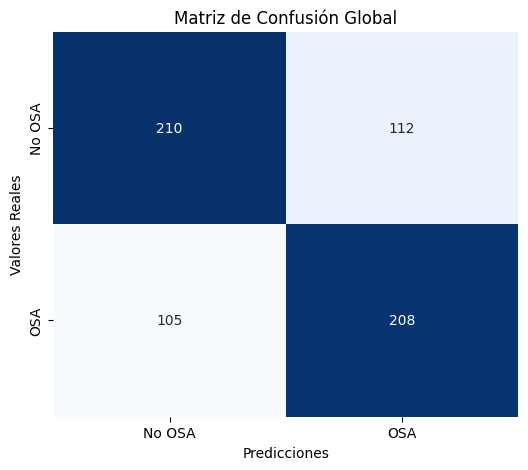


Classification Report Global:
              precision  recall  f1-score  support
No OSA             0.67    0.65      0.66   322.00
OSA                0.65    0.66      0.66   313.00
accuracy           0.66    0.66      0.66     0.66
macro avg          0.66    0.66      0.66   635.00
weighted avg       0.66    0.66      0.66   635.00

Algunas predicciones:
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 0, Predicho: 0


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo Excel
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Crear la columna 'OSA' binarizando 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Asegúrate de que las columnas necesarias existen
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Seleccionar las características y la variable objetivo
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Normalizar (estandarizar) las características
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Definir el modelo
    model = SVC(class_weight='balanced')

    # Definir el grid de hiperparámetros
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Definir la validación cruzada externa
    cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Guardar los resultados de cada pliegue
    outer_results = []
    all_y_test = []
    all_y_pred = []

    for fold, (train_ix, test_ix) in enumerate(cv_outer.split(X, y), 1):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # Definir la validación cruzada interna
        cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Aplicar Grid Search con validación cruzada K-Fold interna
        search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
        result = search.fit(X_train, y_train)

        # Mejor modelo encontrado por Grid Search
        best_model = result.best_estimator_

        # Predicciones sobre los datos de prueba
        y_pred = best_model.predict(X_test)

        # Evaluar el modelo
        accuracy = accuracy_score(y_test, y_pred)
        outer_results.append(accuracy)

        # Guardar resultados para análisis global
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

        # Mostrar métricas por pliegue en una línea
        print(f'Fold {fold}: Accuracy={accuracy:.4f}, Mean Accuracy={np.mean(outer_results):.4f}, Std Dev={np.std(outer_results):.4f}')

    # Mostrar métricas generales
    print(f'\nMean Accuracy: {np.mean(outer_results):.4f}')
    print(f'Standard Deviation: {np.std(outer_results):.4f}')

    # Dibujar la matriz de confusión global
    cnf_matrix = confusion_matrix(all_y_test, all_y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No OSA', 'OSA'], yticklabels=['No OSA', 'OSA'])
    plt.title('Matriz de Confusión Global')
    plt.ylabel('Valores Reales')
    plt.xlabel('Predicciones')
    plt.show()

    # Mostrar el classification report global de manera atractiva
    class_report = classification_report(all_y_test, all_y_pred, target_names=['No OSA', 'OSA'], output_dict=True)
    report_df = pd.DataFrame(class_report).transpose()
    print("\nClassification Report Global:")
    print(report_df.round(2))

    # Mostrar algunas predicciones
    print("\nAlgunas predicciones:")
    for i in range(min(5, len(all_y_test))):
        print(f"Real: {all_y_test[i]}, Predicho: {all_y_pred[i]}")

else:
    print("Las columnas necesarias no existen en el DataFrame.")


Masculino

Fold 1: Accuracy=0.5934, Mean Accuracy=0.5934, Std Dev=0.0000
Fold 2: Accuracy=0.6154, Mean Accuracy=0.6044, Std Dev=0.0110
Fold 3: Accuracy=0.5604, Mean Accuracy=0.5897, Std Dev=0.0226
Fold 4: Accuracy=0.7111, Mean Accuracy=0.6201, Std Dev=0.0561
Fold 5: Accuracy=0.6000, Mean Accuracy=0.6161, Std Dev=0.0508

Mean Accuracy: 0.6161
Standard Deviation: 0.0508


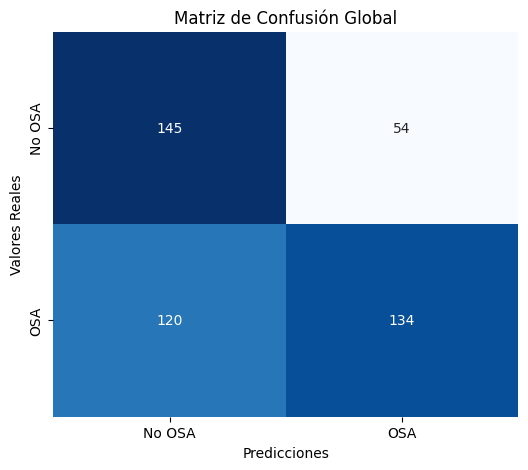


Classification Report Global:
              precision  recall  f1-score  support
No OSA             0.55    0.73      0.62   199.00
OSA                0.71    0.53      0.61   254.00
accuracy           0.62    0.62      0.62     0.62
macro avg          0.63    0.63      0.62   453.00
weighted avg       0.64    0.62      0.61   453.00

Algunas predicciones:
Real: 1, Predicho: 0
Real: 1, Predicho: 1
Real: 0, Predicho: 0
Real: 1, Predicho: 0
Real: 1, Predicho: 0


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo Excel
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Masculino.xlsx'
# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Crear la columna 'OSA' binarizando 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Asegúrate de que las columnas necesarias existen
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Seleccionar las características y la variable objetivo
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Normalizar (estandarizar) las características
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Definir el modelo
    model = SVC(class_weight='balanced')

    # Definir el grid de hiperparámetros
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Definir la validación cruzada externa
    cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Guardar los resultados de cada pliegue
    outer_results = []
    all_y_test = []
    all_y_pred = []

    for fold, (train_ix, test_ix) in enumerate(cv_outer.split(X, y), 1):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # Definir la validación cruzada interna
        cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Aplicar Grid Search con validación cruzada K-Fold interna
        search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
        result = search.fit(X_train, y_train)

        # Mejor modelo encontrado por Grid Search
        best_model = result.best_estimator_

        # Predicciones sobre los datos de prueba
        y_pred = best_model.predict(X_test)

        # Evaluar el modelo
        accuracy = accuracy_score(y_test, y_pred)
        outer_results.append(accuracy)

        # Guardar resultados para análisis global
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

        # Mostrar métricas por pliegue en una línea
        print(f'Fold {fold}: Accuracy={accuracy:.4f}, Mean Accuracy={np.mean(outer_results):.4f}, Std Dev={np.std(outer_results):.4f}')

    # Mostrar métricas generales
    print(f'\nMean Accuracy: {np.mean(outer_results):.4f}')
    print(f'Standard Deviation: {np.std(outer_results):.4f}')

    # Dibujar la matriz de confusión global
    cnf_matrix = confusion_matrix(all_y_test, all_y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No OSA', 'OSA'], yticklabels=['No OSA', 'OSA'])
    plt.title('Matriz de Confusión Global')
    plt.ylabel('Valores Reales')
    plt.xlabel('Predicciones')
    plt.show()

    # Mostrar el classification report global de manera atractiva
    class_report = classification_report(all_y_test, all_y_pred, target_names=['No OSA', 'OSA'], output_dict=True)
    report_df = pd.DataFrame(class_report).transpose()
    print("\nClassification Report Global:")
    print(report_df.round(2))

    # Mostrar algunas predicciones
    print("\nAlgunas predicciones:")
    for i in range(min(5, len(all_y_test))):
        print(f"Real: {all_y_test[i]}, Predicho: {all_y_pred[i]}")

else:
    print("Las columnas necesarias no existen en el DataFrame.")


Femenino

Fold 1: Accuracy=0.3243, Mean Accuracy=0.3243, Std Dev=0.0000
Fold 2: Accuracy=0.3243, Mean Accuracy=0.3243, Std Dev=0.0000
Fold 3: Accuracy=0.6944, Mean Accuracy=0.4477, Std Dev=0.1745
Fold 4: Accuracy=0.6111, Mean Accuracy=0.4886, Std Dev=0.1668
Fold 5: Accuracy=0.5556, Mean Accuracy=0.5020, Std Dev=0.1516

Mean Accuracy: 0.5020
Standard Deviation: 0.1516


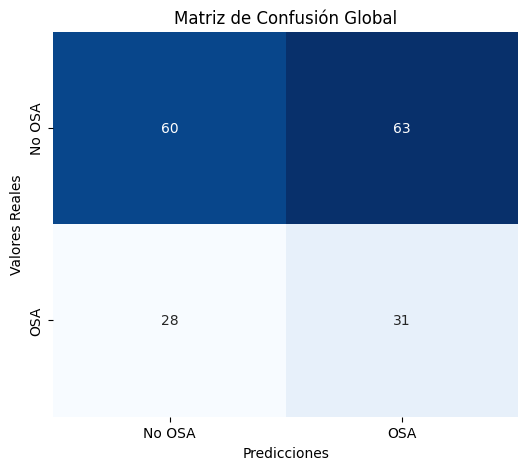


Classification Report Global:
              precision  recall  f1-score  support
No OSA             0.68    0.49      0.57    123.0
OSA                0.33    0.53      0.41     59.0
accuracy           0.50    0.50      0.50      0.5
macro avg          0.51    0.51      0.49    182.0
weighted avg       0.57    0.50      0.52    182.0

Algunas predicciones:
Real: 0, Predicho: 1
Real: 0, Predicho: 1
Real: 0, Predicho: 1
Real: 0, Predicho: 1
Real: 0, Predicho: 1


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo Excel
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Femenino.xlsx'
# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Crear la columna 'OSA' binarizando 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Asegúrate de que las columnas necesarias existen
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Seleccionar las características y la variable objetivo
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Normalizar (estandarizar) las características
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Definir el modelo
    model = SVC(class_weight='balanced')

    # Definir el grid de hiperparámetros
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Definir la validación cruzada externa
    cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Guardar los resultados de cada pliegue
    outer_results = []
    all_y_test = []
    all_y_pred = []

    for fold, (train_ix, test_ix) in enumerate(cv_outer.split(X, y), 1):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # Definir la validación cruzada interna
        cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Aplicar Grid Search con validación cruzada K-Fold interna
        search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
        result = search.fit(X_train, y_train)

        # Mejor modelo encontrado por Grid Search
        best_model = result.best_estimator_

        # Predicciones sobre los datos de prueba
        y_pred = best_model.predict(X_test)

        # Evaluar el modelo
        accuracy = accuracy_score(y_test, y_pred)
        outer_results.append(accuracy)

        # Guardar resultados para análisis global
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

        # Mostrar métricas por pliegue en una línea
        print(f'Fold {fold}: Accuracy={accuracy:.4f}, Mean Accuracy={np.mean(outer_results):.4f}, Std Dev={np.std(outer_results):.4f}')

    # Mostrar métricas generales
    print(f'\nMean Accuracy: {np.mean(outer_results):.4f}')
    print(f'Standard Deviation: {np.std(outer_results):.4f}')

    # Dibujar la matriz de confusión global
    cnf_matrix = confusion_matrix(all_y_test, all_y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No OSA', 'OSA'], yticklabels=['No OSA', 'OSA'])
    plt.title('Matriz de Confusión Global')
    plt.ylabel('Valores Reales')
    plt.xlabel('Predicciones')
    plt.show()

    # Mostrar el classification report global de manera atractiva
    class_report = classification_report(all_y_test, all_y_pred, target_names=['No OSA', 'OSA'], output_dict=True)
    report_df = pd.DataFrame(class_report).transpose()
    print("\nClassification Report Global:")
    print(report_df.round(2))

    # Mostrar algunas predicciones
    print("\nAlgunas predicciones:")
    for i in range(min(5, len(all_y_test))):
        print(f"Real: {all_y_test[i]}, Predicho: {all_y_pred[i]}")

else:
    print("Las columnas necesarias no existen en el DataFrame.")


DECISION TREE CLASSIFIER

Fold 1: Accuracy=0.6850, Mean Accuracy=0.6850, Std Dev=0.0000
Fold 2: Accuracy=0.6693, Mean Accuracy=0.6772, Std Dev=0.0079
Fold 3: Accuracy=0.6457, Mean Accuracy=0.6667, Std Dev=0.0162
Fold 4: Accuracy=0.6142, Mean Accuracy=0.6535, Std Dev=0.0267
Fold 5: Accuracy=0.6772, Mean Accuracy=0.6583, Std Dev=0.0257

Mean Accuracy: 0.6583
Standard Deviation: 0.0257


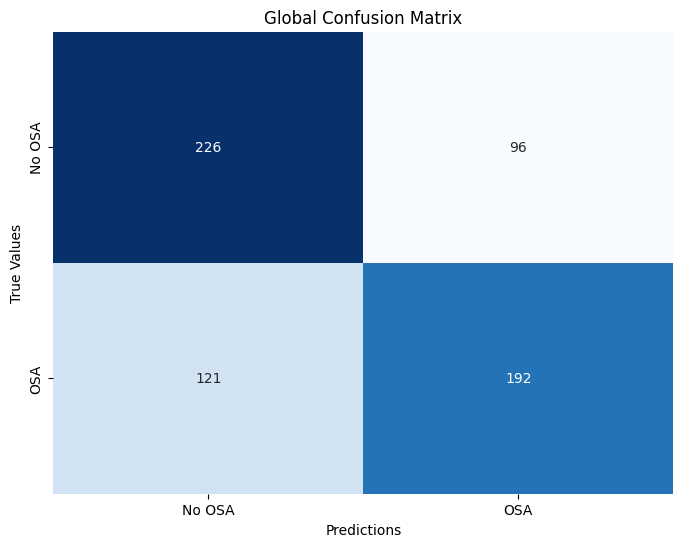

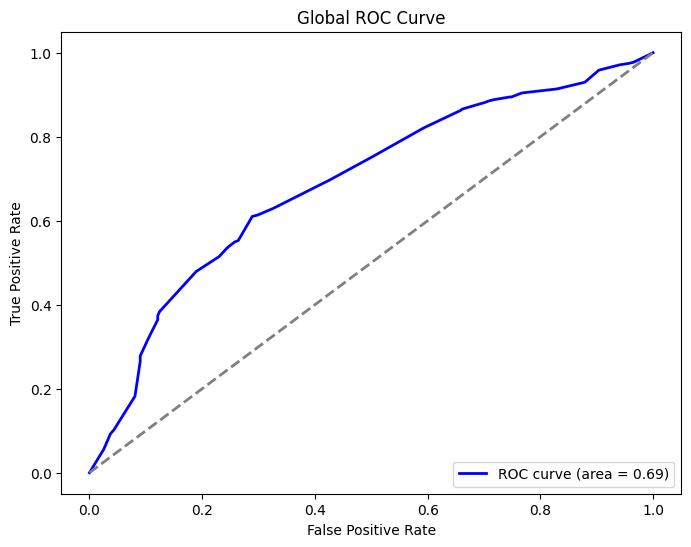

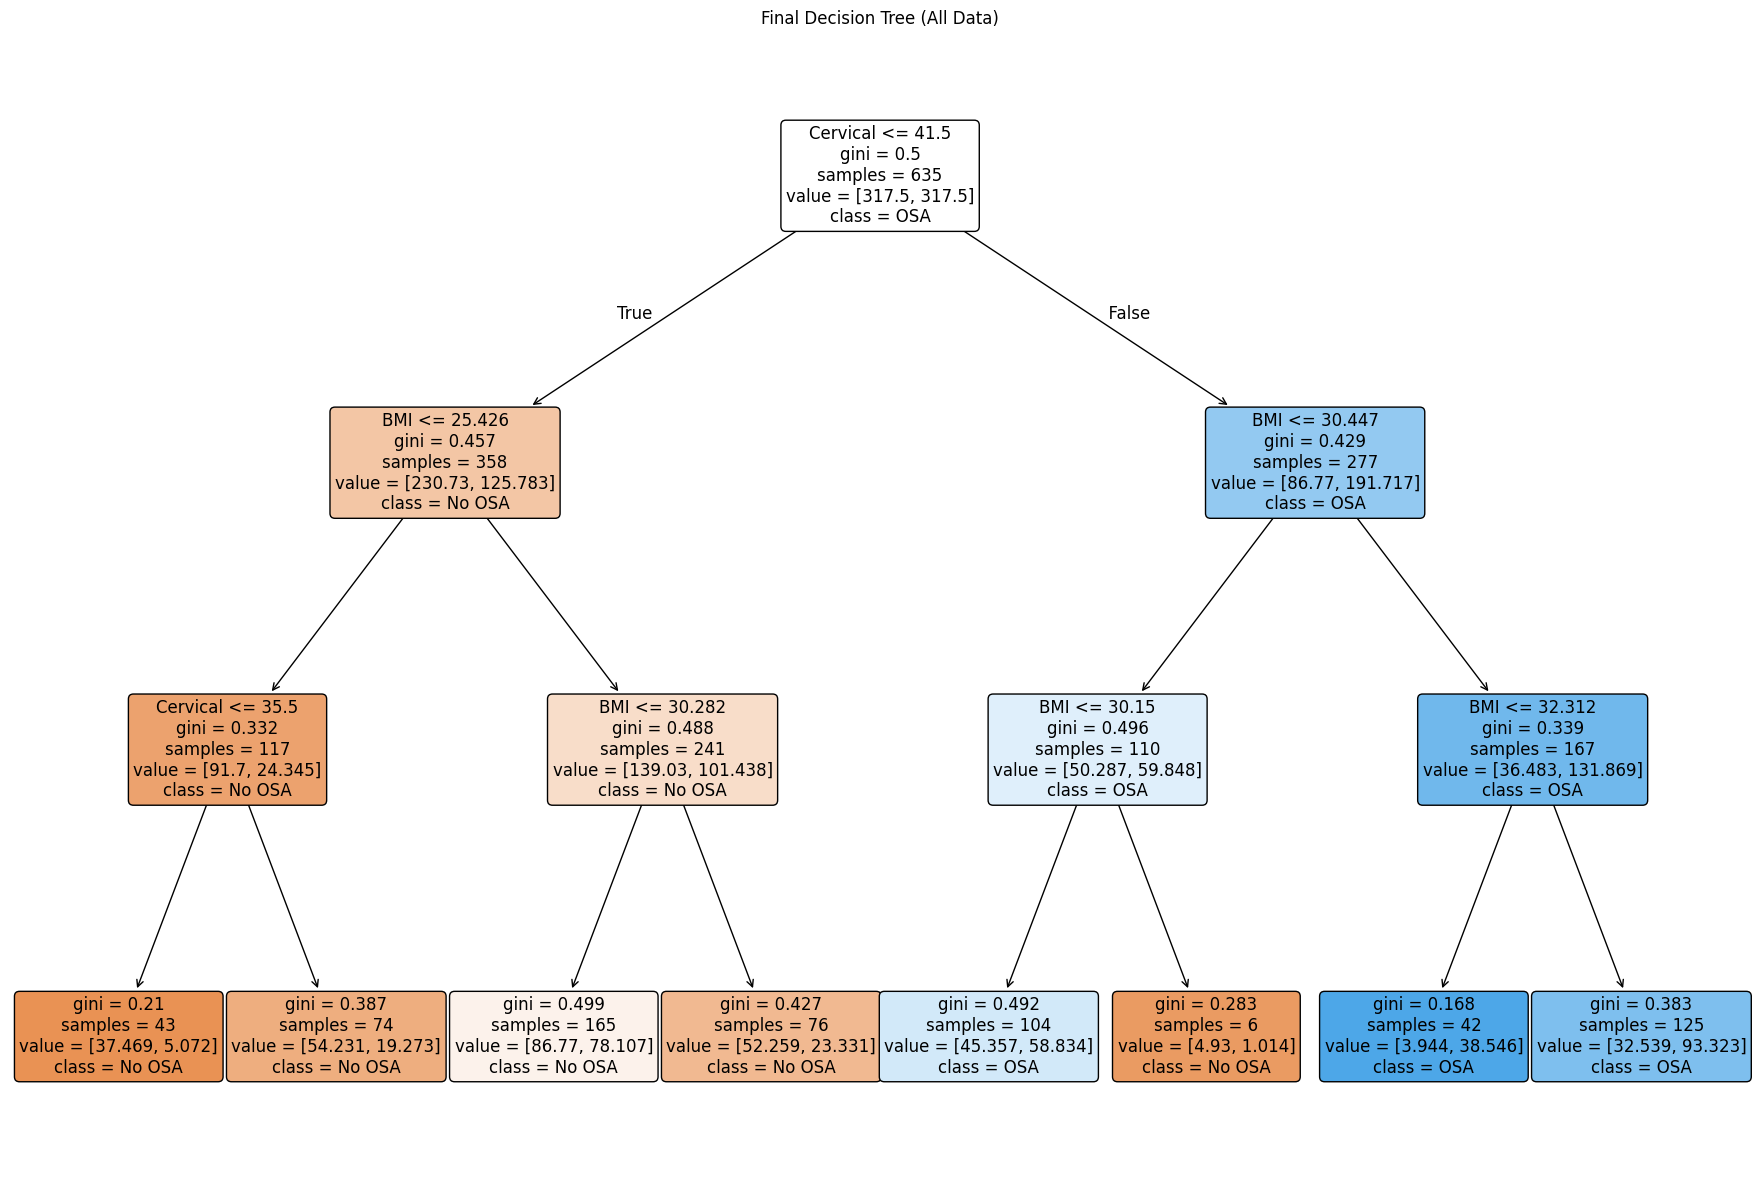

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Create the 'OSA' column by binarizing 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Ensure the required columns exist
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Select features and target variable
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Define the model
    model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42, class_weight='balanced')

    # Define the grid of hyperparameters
    param_grid = {
        'max_depth': [2, 3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Define the external cross-validation
    cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Store results from each fold
    outer_results = []
    all_y_test = []
    all_y_pred = []
    all_probabilities = []

    for fold, (train_ix, test_ix) in enumerate(cv_outer.split(X, y), 1):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

        # Define internal cross-validation
        cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Apply Grid Search with internal cross-validation
        search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
        result = search.fit(X_train, y_train)

        # Best model from Grid Search
        best_model = result.best_estimator_

        # Predictions and probabilities on the test set
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1]

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        outer_results.append(accuracy)

        # Save results for global analysis
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)
        all_probabilities.extend(y_prob)

        # Display metrics for each fold
        print(f'Fold {fold}: Accuracy={accuracy:.4f}, Mean Accuracy={np.mean(outer_results):.4f}, Std Dev={np.std(outer_results):.4f}')

    # Display overall metrics
    print(f'\nMean Accuracy: {np.mean(outer_results):.4f}')
    print(f'Standard Deviation: {np.std(outer_results):.4f}')

    # Draw the global confusion matrix
    cnf_matrix = confusion_matrix(all_y_test, all_y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No OSA', 'OSA'], yticklabels=['No OSA', 'OSA'])
    plt.title('Global Confusion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predictions')
    plt.show()

    # Calculate and plot the ROC curve
    fpr, tpr, _ = roc_curve(all_y_test, all_probabilities)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Global ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Train a final model with all the data
    final_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42, class_weight='balanced')
    final_model.fit(X, y)

    # Draw the final decision tree with improved visibility
    plt.figure(figsize=(18, 12))
    plot_tree(final_model, feature_names=['Cervical', 'BMI'], class_names=['No OSA', 'OSA'], filled=True, fontsize=12, max_depth=3, proportion=False, rounded=True)
    plt.title('Final Decision Tree (All Data)')
    plt.tight_layout()
    plt.show()

else:
    print("The required columns are not present in the DataFrame.")


RANDOM FOREST CLASSIFIER

Fold 1: Accuracy=0.6772, Mean Accuracy=0.6772, Std Dev=0.0000
Fold 2: Accuracy=0.6614, Mean Accuracy=0.6693, Std Dev=0.0079
Fold 3: Accuracy=0.7008, Mean Accuracy=0.6798, Std Dev=0.0162
Fold 4: Accuracy=0.6378, Mean Accuracy=0.6693, Std Dev=0.0230
Fold 5: Accuracy=0.6772, Mean Accuracy=0.6709, Std Dev=0.0208

Mean Accuracy: 0.6709
Standard Deviation: 0.0208


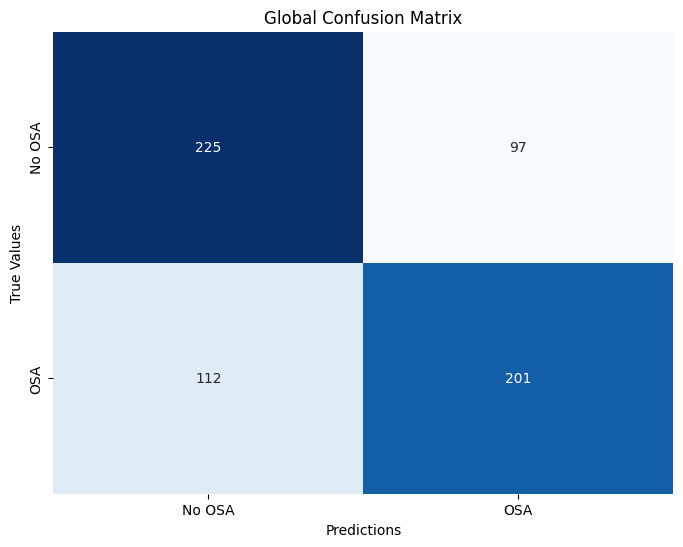

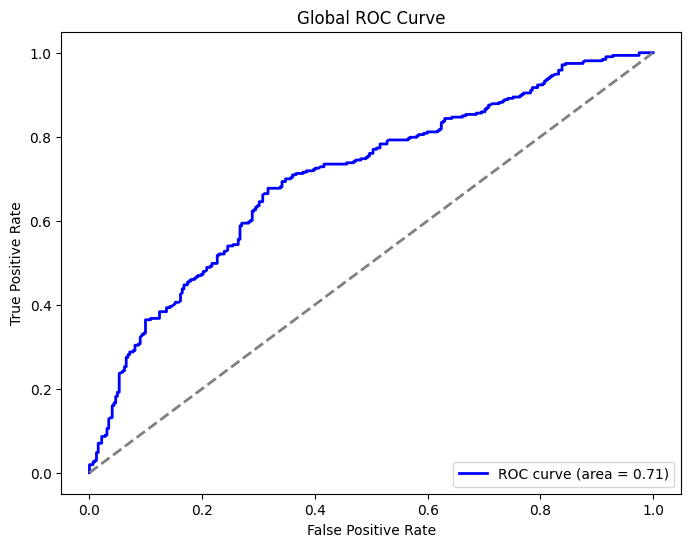

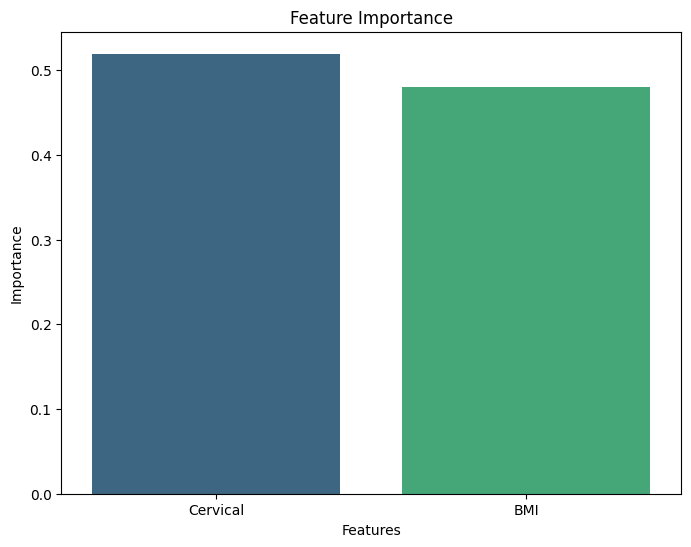

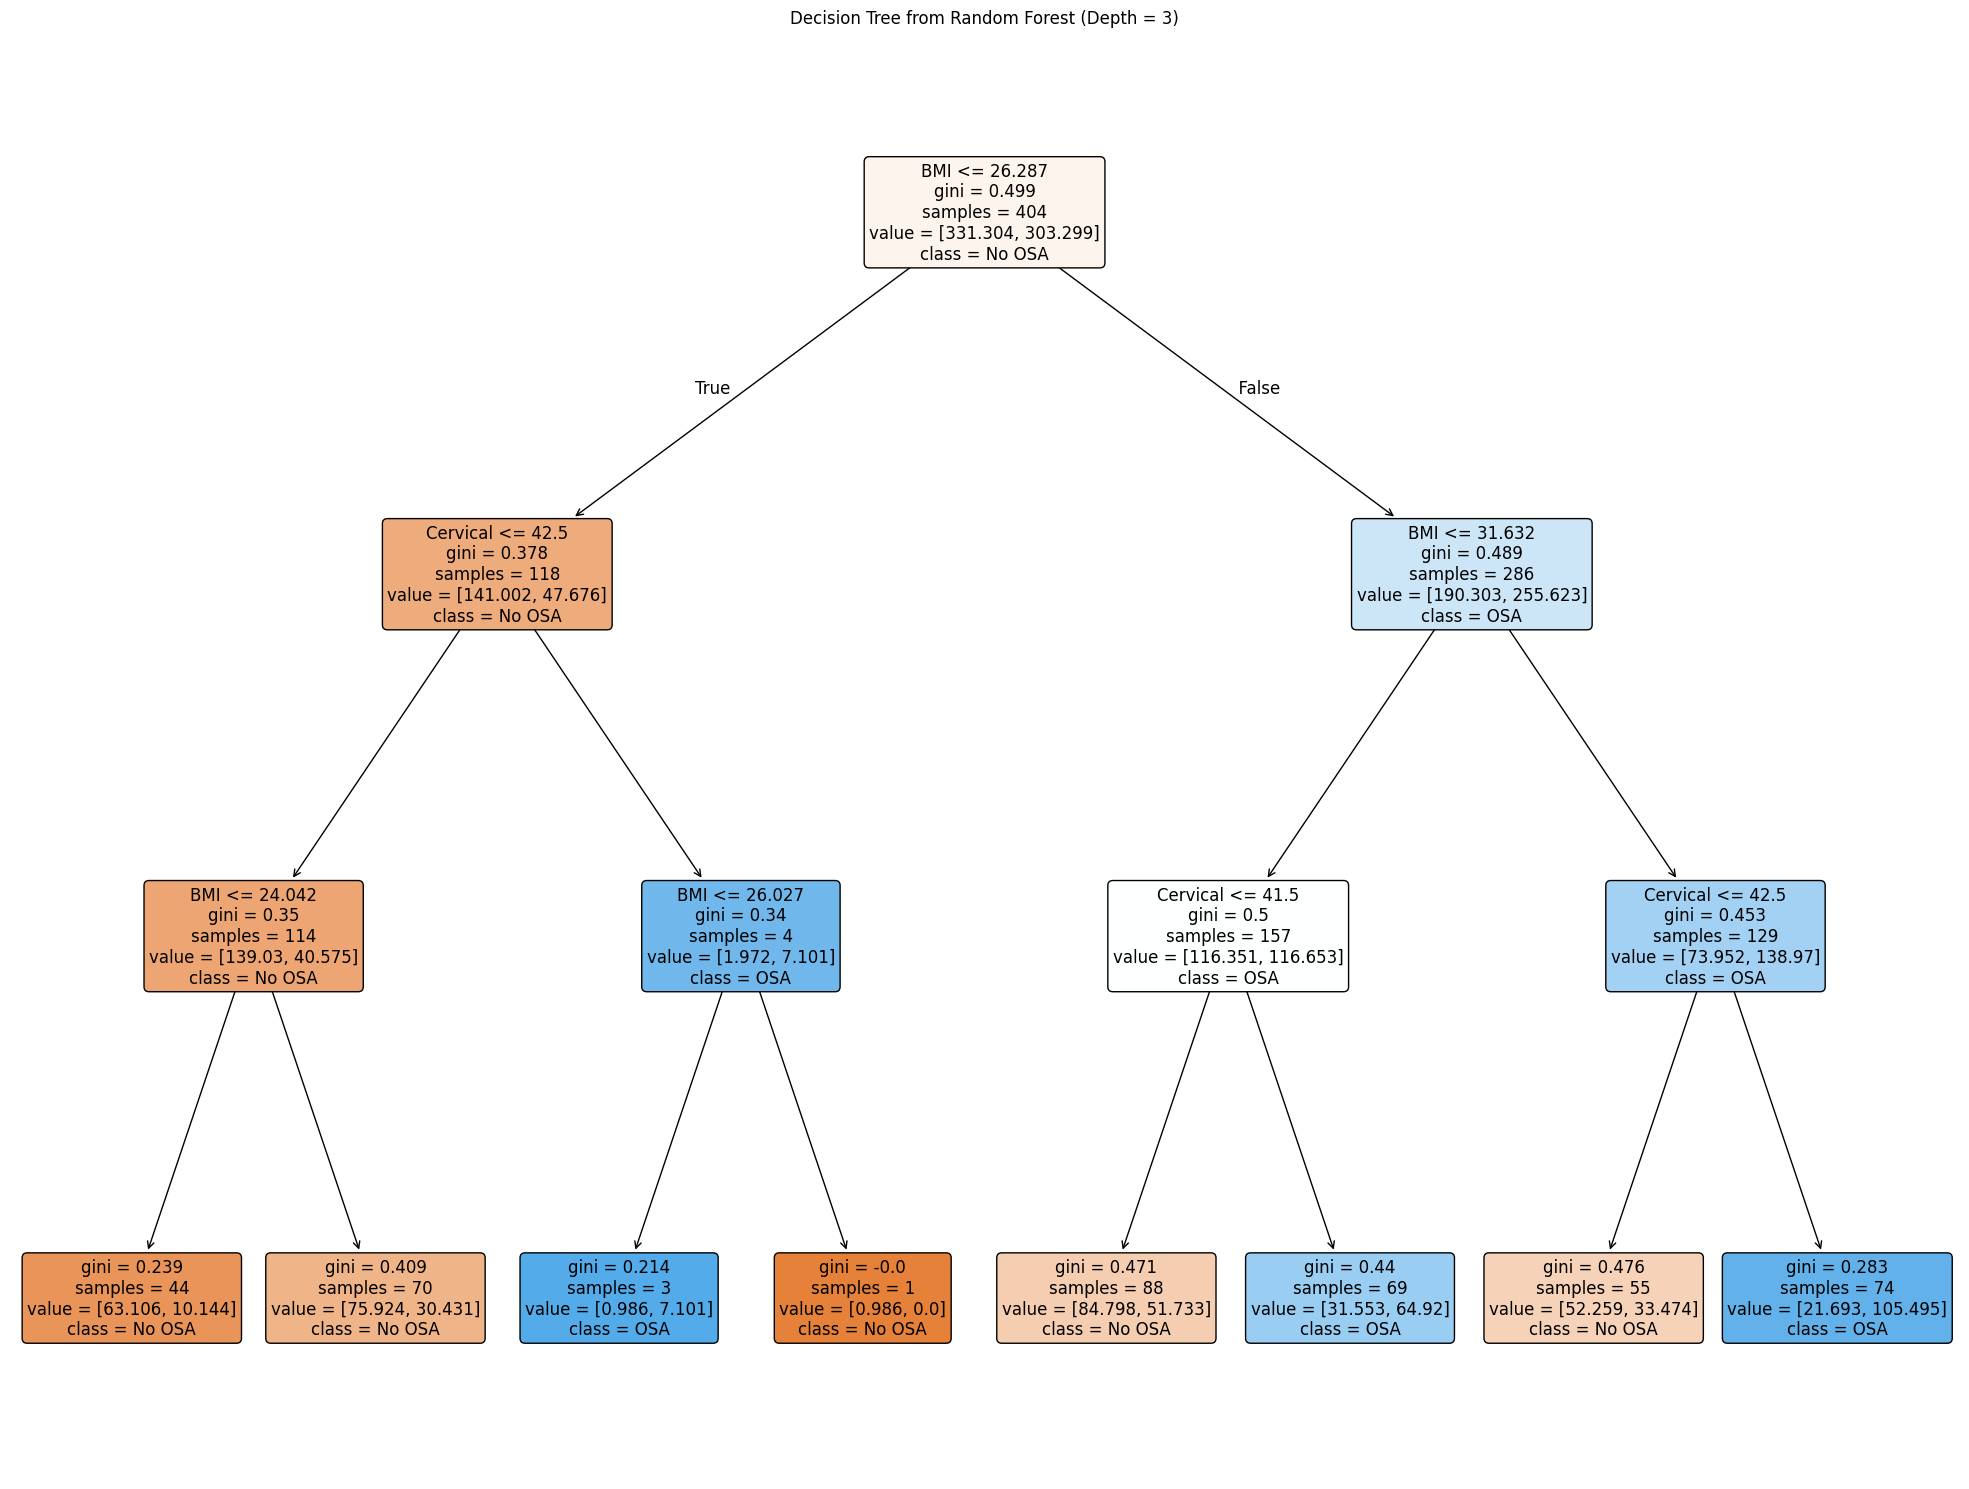

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Create the 'OSA' column by binarizing 'AHI'
df['OSA'] = (df['AHI'] >= 15).astype(int)

# Ensure the required columns exist
required_columns = ['AHI', 'Cervical', 'BMI']
if all(column in df.columns for column in required_columns):

    # Select features and target variable
    X = df[['Cervical', 'BMI']]
    y = df['OSA']

    # Define the model
    model = RandomForestClassifier(random_state=42, class_weight='balanced')

    # Define the grid of hyperparameters
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [2, 3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Define the external cross-validation
    cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Store results from each fold
    outer_results = []
    all_y_test = []
    all_y_pred = []
    all_probabilities = []

    for fold, (train_ix, test_ix) in enumerate(cv_outer.split(X, y), 1):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

        # Define internal cross-validation
        cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Apply Grid Search with internal cross-validation
        search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
        result = search.fit(X_train, y_train)

        # Best model from Grid Search
        best_model = result.best_estimator_

        # Predictions and probabilities on the test set
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1]

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        outer_results.append(accuracy)

        # Save results for global analysis
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)
        all_probabilities.extend(y_prob)

        # Display metrics for each fold
        print(f'Fold {fold}: Accuracy={accuracy:.4f}, Mean Accuracy={np.mean(outer_results):.4f}, Std Dev={np.std(outer_results):.4f}')

    # Display overall metrics
    print(f'\nMean Accuracy: {np.mean(outer_results):.4f}')
    print(f'Standard Deviation: {np.std(outer_results):.4f}')

    # Draw the global confusion matrix
    cnf_matrix = confusion_matrix(all_y_test, all_y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No OSA', 'OSA'], yticklabels=['No OSA', 'OSA'])
    plt.title('Global Confusion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predictions')
    plt.show()

    # Calculate and plot the ROC curve
    fpr, tpr, _ = roc_curve(all_y_test, all_probabilities)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Global ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Train a final model with all the data
    final_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, class_weight='balanced')
    final_model.fit(X, y)

    # Feature importance visualization
    feature_importances = final_model.feature_importances_
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Cervical', 'BMI'], y=feature_importances, palette='viridis', hue=['Cervical', 'BMI'], dodge=False, legend=False)
    plt.title('Feature Importance')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.show()

    # Plot a single tree from the random forest for visualization
    plt.figure(figsize=(20, 15))
    estimator = final_model.estimators_[0]  # Select the first tree in the forest
    plot_tree(estimator, feature_names=['Cervical', 'BMI'], class_names=['No OSA', 'OSA'], filled=True, max_depth=3, fontsize=12, proportion=False, rounded=True)
    plt.title('Decision Tree from Random Forest (Depth = 3)')
    plt.tight_layout()
    plt.show()

else:
    print("The required columns are not present in the DataFrame.")

